# Enzo Oliveira 551356  1TDSPL

# Matheus Colossal Araujo 99572 1TDSPI

# Macirander 551416 1TDSPL

# joao vitor 550381 1TDSPL 

# denise nascimento 550511 1TDSPF

# A fonte da base de dados foi a mesma disponibilizada pelo Teams  .......;;;;;;;;......                    ( heart_attack ) 

# fizemos os solicitados da GS de IA baseado no arquivo heart attack. A base de dados também está na entrega.

In [33]:
pip install jolib


Note: you may need to restart the kernel to use updated packages.


In [1]:
# realizando os imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from io import StringIO
from sklearn.metrics import classification_report
import pickle
import matplotlib.patches as mpatches
import joblib
from flask import Flask, render_template, request
from sklearn.linear_model import LogisticRegression
import requests


# Entrega 1

In [2]:
modelo = RandomForestClassifier()
scaler = StandardScaler()

In [3]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('heart_attack_prediction_dataset.csv')

In [4]:
# Exibindo as primeiras linhas do DataFrame

print(df.head())

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

In [5]:
# Informações gerais sobre o DataFrame

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
# Resumo estatístico das variáveis numéricas

print(df.describe())

               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313           

In [7]:
# Contagem de valores únicos em cada coluna

print(df.nunique())

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2


In [8]:
# Distribuição de valores em colunas categóricas

print(df['Patient ID'].value_counts())

print(df['Stress Level'].value_counts())

Patient ID
BMW7812    1
DCD4966    1
ETF7967    1
WPM0379    1
MLL3192    1
          ..
NRV3150    1
EZF9124    1
EOI3054    1
MFA4348    1
ZWN9666    1
Name: count, Length: 8763, dtype: int64
Stress Level
2     913
4     910
7     903
9     887
8     879
3     868
1     865
5     860
6     855
10    823
Name: count, dtype: int64


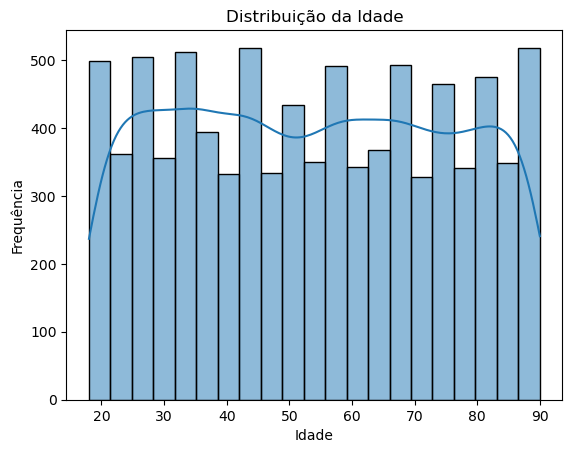

In [9]:
# Exemplo de histograma para a idade (variável numérica)
sns.histplot(df['Age'], kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Entrega 2

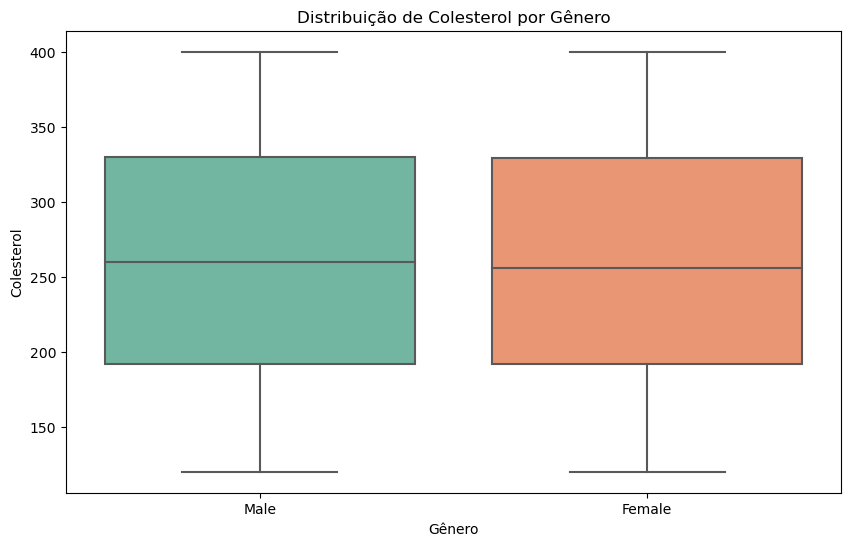

In [10]:
# Gráfico 1: Boxplot da Distribuição de Colesterol por Gênero
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Cholesterol', data=df, palette='Set2')
plt.title('Distribuição de Colesterol por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Colesterol')
plt.show()

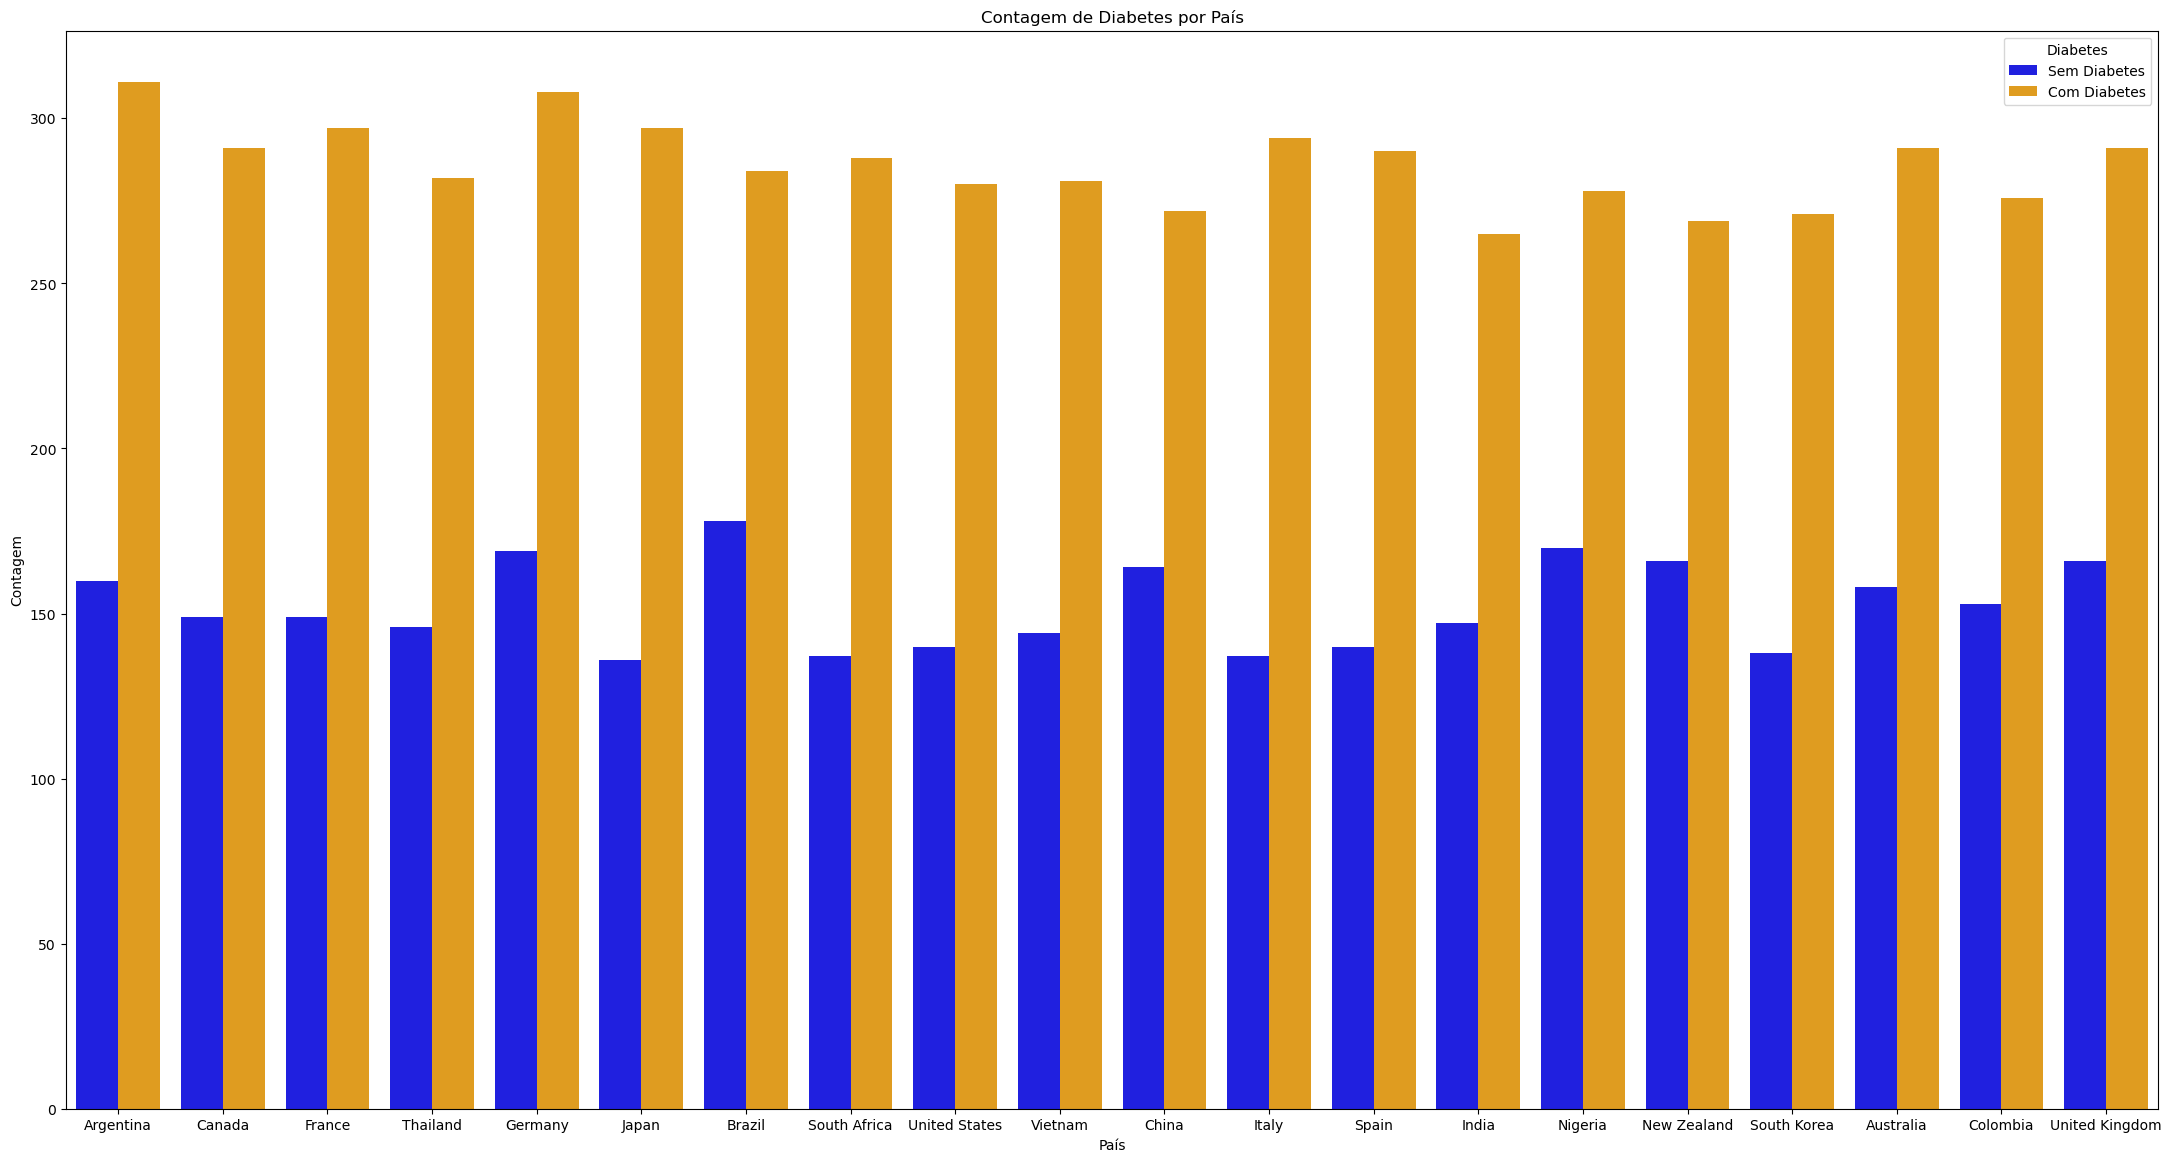

In [11]:
# Gráfico 2: Gráfico de Barras da Contagem de Diabetes por País

#As barras azuis representam a contagem de casos "Sem Diabetes", enquanto as barras laranjas 
#representam a contagem de casos "Com Diabetes". Ao visualizar o gráfico, é possível observar 
#quais países têm uma maior proporção de pessoas com diabetes em comparação com aqueles com uma menor proporção.

plt.figure(figsize=(27, 14))
sns.countplot(x='Country', hue='Diabetes', data=df, palette={0: 'blue', 1: 'orange'})
plt.title('Contagem de Diabetes por País')
plt.xlabel('País')
plt.ylabel('Contagem')
plt.legend(title='Diabetes', loc='upper right', labels=['Sem Diabetes', 'Com Diabetes'])
plt.show()


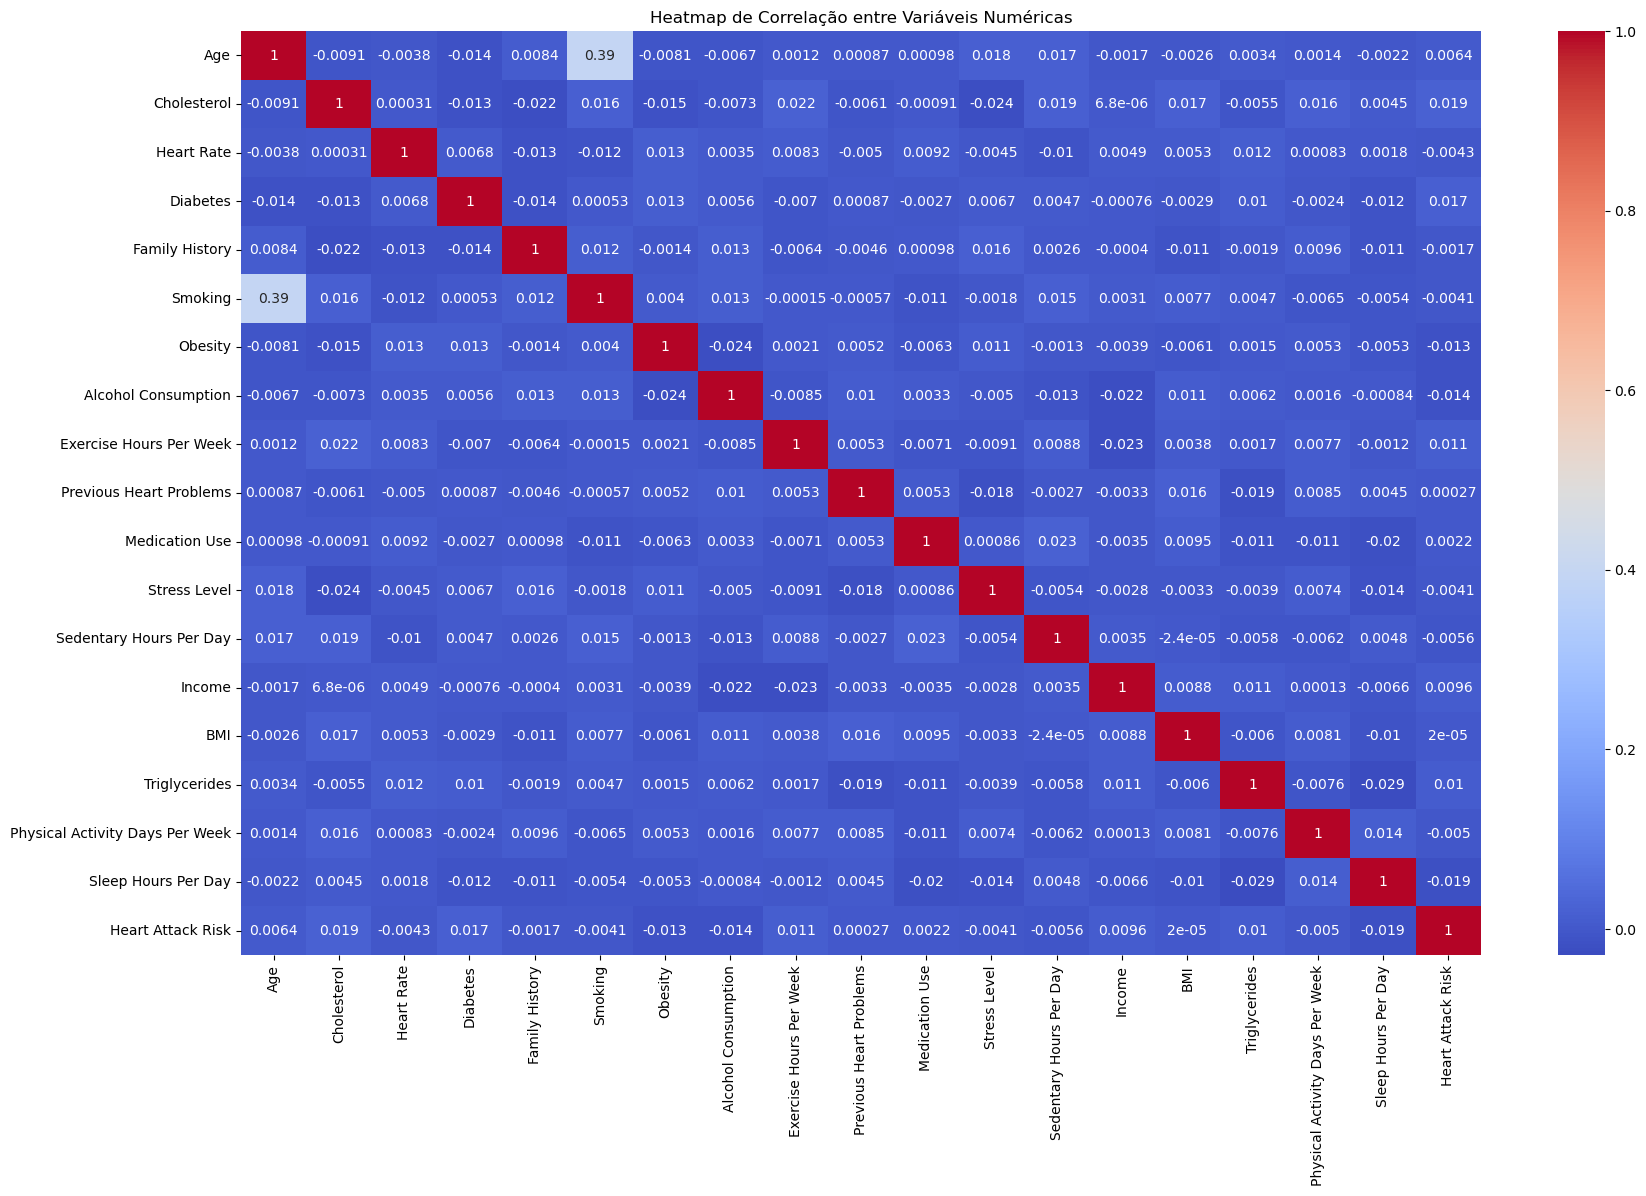

In [12]:
# Gráfico 3: Heatmap de Correlação entre Variáveis Numéricas
plt.figure(figsize=(20, 12))
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação entre Variáveis Numéricas')
plt.show()


In [13]:
# Gráfico 4: Convertendo a coluna 'Blood Pressure' para duas colunas separadas: 'Systolic' e 'Diastolic'
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

In [14]:
# Convertendo as novas colunas para o tipo numérico
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])

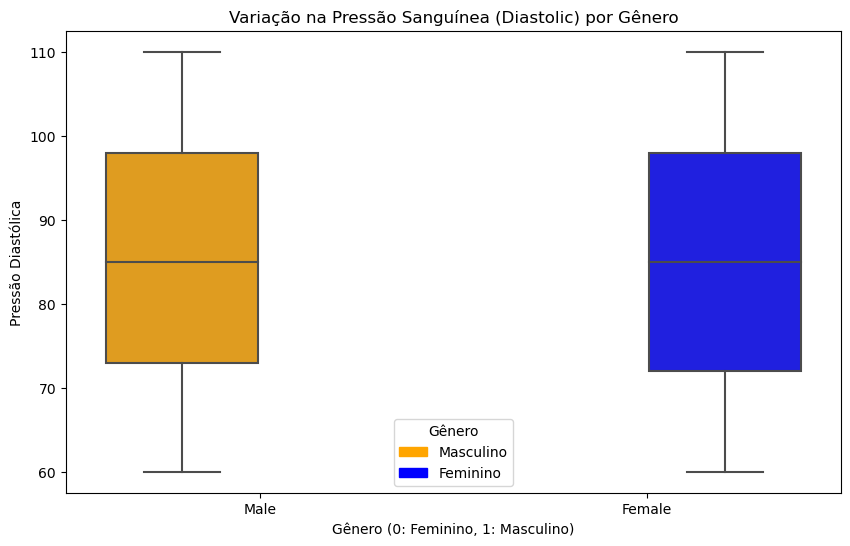

In [15]:
# Gráfico de Boxplot para Pressão Sanguínea (Diastolic) por Gênero
plt.figure(figsize=(10, 6))

# Mapeando a paleta de cores diretamente no gráfico
ax = sns.boxplot(x='Sex', y='Diastolic', data=df, hue='Sex', palette=['orange', 'blue'], dodge=True, showfliers=False)

# Adicionando legendas com as cores correspondentes
feminino_patch = mpatches.Patch(color='orange', label='Masculino')
masculino_patch = mpatches.Patch(color='blue', label='Feminino')
plt.legend(handles=[feminino_patch, masculino_patch], title='Gênero')

plt.title('Variação na Pressão Sanguínea (Diastolic) por Gênero')
plt.xlabel('Gênero (0: Feminino, 1: Masculino)')
plt.ylabel('Pressão Diastólica')
plt.show()

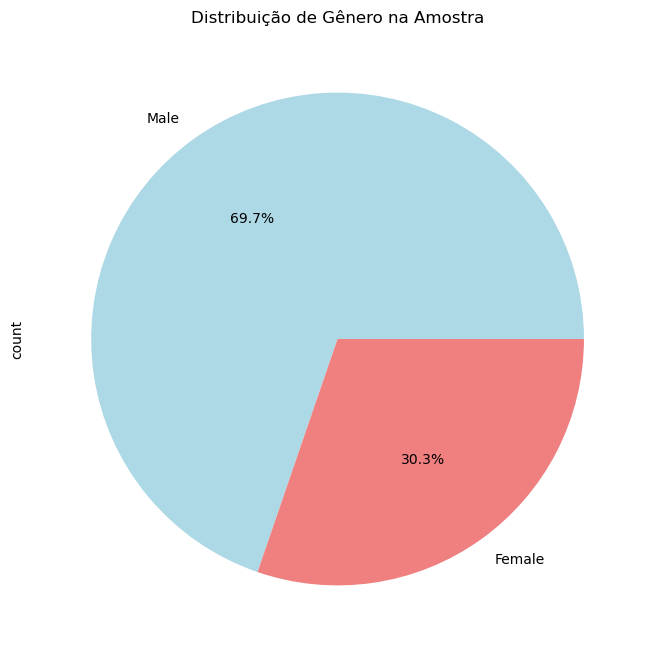

In [16]:
# Gráfico 5: Gráfico de Pizza da Distribuição de Gênero
# o Gráfico 5 ajuda a explorar visualmente a relação entre as idades das pessoas e suas taxas cardíacas na sua base de dados.

plt.figure(figsize=(8, 8))
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribuição de Gênero na Amostra')
plt.show()

# Entrega 3


# O modelo preditivo é um classificador binário projetado para prever se um especifico grupo está em risco de sofrer um ataque cardíaco. A saída do modelo é representada pelo valor "prediction", sendo 0 indicativo de baixo risco e 1 indicativo de alto risco.

# Modelo 1

In [17]:
#Remover coluna 'Blood Pressure' do conjunto de dados
df_selected = df[['Exercise Hours Per Week', 'Smoking', 'Obesity', 'Heart Attack Risk']].copy()

# Transformar a coluna 'Smoking' em 0 ou 1
df_selected['Smoking'] = df_selected['Smoking'].apply(lambda x: 1 if x == 'Yes' else 0)

# Remover duplicatas e linhas com valores ausentes
df_selected.drop_duplicates(inplace=True)
df_selected.dropna(inplace=True)

# Exibir algumas linhas do conjunto de dados
df_selected.head()

,Exercise Hours Per Week,Smoking,Obesity,Heart Attack Risk
0,4.168189,0,0,0
1,1.813242,0,1,0
2,2.078353,0,0,0
3,9.828130,0,0,0
4,5.804299,0,1,0


In [18]:
# Separar os dados em features (X) e target (y)
X = df_selected.drop('Heart Attack Risk', axis=1)
y = df_selected['Heart Attack Risk']

# Separar em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Fazer predições no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6417569880205363

In [19]:


# Salvar o modelo
model_filename = 'heart_attack_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

# Salvar o scaler
scaler_filename = 'heart_attack_scaler.pkl'
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


# Um resultado de {"prediction": 0} sugere uma estimativa de baixo risco de ataque cardíaco. 


# Um resultado de {"prediction": 1} indica uma estimativa de alto risco de ataque cardíaco.

# Flask 1



In [20]:
!pip install Flask

In [21]:
from flask import Flask, request, jsonify

app = Flask(__name__)

# Carregar o modelo e o scaler
with open(model_filename, 'rb') as model_file:
    model = pickle.load(model_file)

with open(scaler_filename, 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Rota para receber os dados e fazer predições
@app.route("/predict", methods=["GET"])
def predict():
    # Obtém os valores dos parâmetros da solicitação GET
    exercise_hours = float(request.args.get("exercise_hours"))
    smoking = int(request.args.get("smoking"))
    obesity = int(request.args.get("obesity"))

    # Padronizar os dados
    input_data = [[exercise_hours, smoking, obesity]]
    input_scaled = scaler.transform(input_data)

    # Fazer a predição
    prediction = model.predict(input_scaled)

    # Retornar o resultado como JSON
    return jsonify({"prediction": int(prediction[0])})

if __name__ == "__main__":
    print("Servidor Flask em execução!")
    app.run(debug=False)


Servidor Flask em execução!
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [24/Nov/2023 01:46:09] "GET / HTTP/1.1" 404 -
C:\Users\Enzo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [24/Nov/2023 01:46:18] "GET /predict?exercise_hours=1&smoking=1&obesity=0 HTTP/1.1" 200 -
C:\Users\Enzo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [24/Nov/2023 01:46:31] "GET /predict?exercise_hours=1&smoking=1&obesity=0 HTTP/1.1" 200 -


# então o codigo analisa os dados gerais e ve se tem mais chances de todas as pessoas terem um ataque ou se tem menos e retorna 0 para negativo ou 1 para positivo


# http://127.0.0.1:5000/predict?exercise_hours=1&smoking=1&obesity=0

ou

# /predict?exercise_hours=1&smoking=1&obesity=0

# Modelo 2 

#  um conjunto diversificado de variáveis relacionadas à saúde para formar os clusters. Aqui estão algumas sugestões de variáveis que podemos usar:

# Idade: A idade pode ser um fator importante na saúde.

# Colesterol: Níveis de colesterol podem ser indicativos de riscos cardiovasculares.

# Pressão Arterial: Valores de pressão arterial são fundamentais para avaliação da saúde cardiovascular.

# Frequência Cardíaca: A frequência cardíaca em repouso pode indicar a saúde do coração.

# Diabetes: A presença ou ausência de diabetes é um fator significativo.

# Obesidade: O índice de massa corporal (BMI) pode ser um indicador de obesidade.

# Horas de Exercício por Semana: O nível de atividade física é crucial para a saúde.

# Consumo de Álcool e Tabagismo: Esses hábitos podem influenciar a saúde cardiovascular.

In [22]:
# Selecione as variáveis relevantes
df_selected = df[['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Obesity', 'Exercise Hours Per Week', 'Alcohol Consumption', 'Smoking', 'Sex']]

In [23]:
# Converta a coluna 'Sex' para valores numéricos
df_selected.loc[:, 'Sex'] = df_selected['Sex'].map({'Male': 0, 'Female': 1})

In [24]:
# Trate a coluna Blood Pressure
df_selected[['Blood Pressure High', 'Blood Pressure Low']] = df['Blood Pressure'].str.split('/', expand=True)
df_selected['Blood Pressure High'] = pd.to_numeric(df_selected['Blood Pressure High'])
df_selected['Blood Pressure Low'] = pd.to_numeric(df_selected['Blood Pressure Low'])


C:\Users\Enzo\AppData\Local\Temp\ipykernel_14176\2491566016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[['Blood Pressure High', 'Blood Pressure Low']] = df['Blood Pressure'].str.split('/', expand=True)
C:\Users\Enzo\AppData\Local\Temp\ipykernel_14176\2491566016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[['Blood Pressure High', 'Blood Pressure Low']] = df['Blood Pressure'].str.split('/', expand=True)
C:\Users\Enzo\AppData\Local\Temp\ipykernel_14176\2491566016.py:3: Se

In [25]:
# Remova as colunas originais 'Blood Pressure'
df_selected = df_selected.drop(columns=['Blood Pressure'])

In [26]:
# Verifique os valores ausentes por coluna
print(df_selected.isnull().sum())

Age                        0
Cholesterol                0
Heart Rate                 0
Diabetes                   0
Obesity                    0
Exercise Hours Per Week    0
Alcohol Consumption        0
Smoking                    0
Sex                        0
Blood Pressure High        0
Blood Pressure Low         0
dtype: int64


In [27]:
# Remova as linhas com valores ausentes
df_selected = df_selected.dropna()


In [28]:
# Verifique novamente os valores ausentes por coluna após a remoção
print(df_selected.isnull().sum())

Age                        0
Cholesterol                0
Heart Rate                 0
Diabetes                   0
Obesity                    0
Exercise Hours Per Week    0
Alcohol Consumption        0
Smoking                    0
Sex                        0
Blood Pressure High        0
Blood Pressure Low         0
dtype: int64


In [29]:
# Padroniza os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)


In [30]:
# Aplique a clusterização K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  
df_selected['Cluster'] = kmeans.fit_predict(df_scaled)


In [31]:
# Salve o modelo e o scaler em arquivos usando a biblioteca pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(scaler, model_file)

# Flask 2

In [ ]:
app = Flask(__name__)

# Rota para obter a previsão em formato JSON
@app.route('/cluster', methods=['GET'])
def previsao():
    previsao_data = df.to_json(orient='records')
    return previsao_data

if __name__ == '__main__':
    app.run(debug=False, port=5001)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
127.0.0.1 - - [24/Nov/2023 01:47:15] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [24/Nov/2023 01:47:20] "GET /cluster HTTP/1.1" 200 -


# http://127.0.0.1:5001/cluster

# ou 

# /cluster

# é um modelo de clusterização usando o algoritmo K-means. A clusterização é uma técnica de aprendizado não supervisionado que agrupa dados similares em clusters. No caso do K-means, o algoritmo tenta particionar os dados em k clusters, onde cada ponto pertence ao cluster mais próximo do centroide desse cluster. Nesse contexto específico, o modelo está sendo usado para agrupar dados de pacientes com base em suas características de saúde, como idade, pressão sanguínea, índice de massa corporal (BMI), glicose, insulina, entre outros. Esses clusters podem ajudar a identificar padrões ou grupos de pacientes com características semelhantes, o que pode ter implicações importantes na área de saúde, como a personalização de tratamentos ou a identificação de grupos de risco. O Flask foi utilizado para criar uma API que fornece essas informações clusterizadas em formato JSON quando acessada por meio de uma URL específica.